In [30]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("handled-car-mpg.csv")

columns_to_drop = ['mpg']
# Separate features (X) and target (y)
X = df.drop(columns=columns_to_drop, axis=1).values
y = df['mpg'].values.reshape(-1, 1)


# Step 1: Shuffle the data
np.random.seed(42)  # for reproducibility
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

# Step 2: 70/30 split
split_index = int(0.7 * X.shape[0])
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 3: Z-score normalization (standardization) for X
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std  # use train mean & std!

# Step 4: Initialize parameters
m, n = X_train_scaled.shape
w = np.random.uniform(low=-1.0, high=1.0, size=(n, 1))
b = 0.0


# **Multiple Linear Regression model from Scratch**

In [31]:
#Functions

def compute_cost(x, y, w, b):
    m,n = x.shape

    f_wb = np.dot(x,w) + b
    cost = (1/(2 *m)) * np.sum((f_wb - y)**2)
    return cost
    
def compute_gradient(x, y, w, b, L2_reg):
    m = x.shape[0]

    f_wb = np.dot(x, w) + b          # shape (m, 1)
    error = f_wb - y                 # shape (m, 1)

    dj_dw = ((1/m) * np.dot(x.T, error)) + ((L2_reg/m) * w)  # shape (n, 1)
    dj_db = ((1/m) * np.sum(error))       # scalar

    return dj_dw, dj_db

def gradient_descent(lr, x, y, w, b, L2_reg, previous_cost, threshold, max_iters=1000000):
    m = x.shape[0]
    iters = 0
    L2_reg = L2_reg
    cost_log = []
    iteration_log = []
    weight_log = []
    bias_log = []

    while True:
        
        dj_dw, dj_db = compute_gradient(x, y, w, b, L2_reg)
        w = w - (lr/m)*(dj_dw)
        b = b - (lr/m)*(dj_db)

        current_cost = compute_cost(x, y, w, b)

        #if iters % 100 == 0:
            #print(f"Iteration {iters} | Cost: {current_cost:.5f} | w: {w.ravel()} | b: {b:.5f}")
            # if iters < 1001 and iters % 200 == 0 and iters > 1:
            #     cost_log.append(current_cost)
            #     iteration_log.append(iters)
            #     weight_log.append(w.flatten().tolist())  # Save as list
            #     bias_log.append(b)
            # elif iters < 10000 and iters > 1001 and iters % 1000 == 0:
            #     cost_log.append(current_cost)
            #     iteration_log.append(iters)
            #     weight_log.append(w.flatten().tolist())  # Save as list
            #     bias_log.append(b)
        
        # if iters % 10000 == 0:
        #     cost_log.append(current_cost)
        #     iteration_log.append(iters)
        #     weight_log.append(w.flatten().tolist())  # Save as list
        #     bias_log.append(b)
            
        if abs(current_cost-previous_cost) < threshold:
            print(f"Converged in {iters} iterations.")
            break

        previous_cost = current_cost
        iters += 1
        if iters >= max_iters:
            print("Stopped: Max iterations reached.")
            break


    return w , b # ,cost_log , iteration_log , weight_log , bias_log

def predict(x_test_scaled, w, b):
    return np.dot(x_test_scaled,w) + b
    

In [32]:
wf , bf  = gradient_descent(0.2,X_train_scaled,y_train,w,b,L2_reg=0.5,previous_cost=float('inf'),threshold=1e-9,max_iters=10000000)

Converged in 140508 iterations.


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_train = predict(X_train_scaled, wf, bf)

# Calculate metrics
mse_t = mean_squared_error(y_train, y_pred_train)
mae_t = mean_absolute_error(y_train, y_pred_train)
r2_t = r2_score(y_train, y_pred_train)

# Print results
print(f"\n📊 Training Metrics (from sklearn):")
print(f"Mean Squared Error (MSE): {mse_t:.4f}")
print(f"Mean Absolute Error (MAE): {mae_t:.4f}")
print(f"R² Score: {r2_t:.4f}")


📊 Training Metrics (from sklearn):
Mean Squared Error (MSE): 9.6828
Mean Absolute Error (MAE): 2.2949
R² Score: 0.8450


## **Testing Model and Metrics**

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
y_pred_test = predict(X_test_scaled, wf, bf)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print results
print(f"\n📊 Test Metrics (from sklearn):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")



📊 Test Metrics (from sklearn):
Mean Squared Error (MSE): 5.6778
Mean Absolute Error (MAE): 1.8572
R² Score: 0.8998


In [35]:
print("Final weight (w):", wf)
print("Final bias (b):", bf)

Final weight (w): [[-0.79368401]
 [ 0.10752937]
 [ 0.14111938]
 [-0.4014944 ]
 [ 0.75223576]
 [-2.71424958]
 [-0.73116128]
 [-2.76390156]
 [-1.52777988]
 [-2.65229596]]
Final bias (b): 23.342700729924573


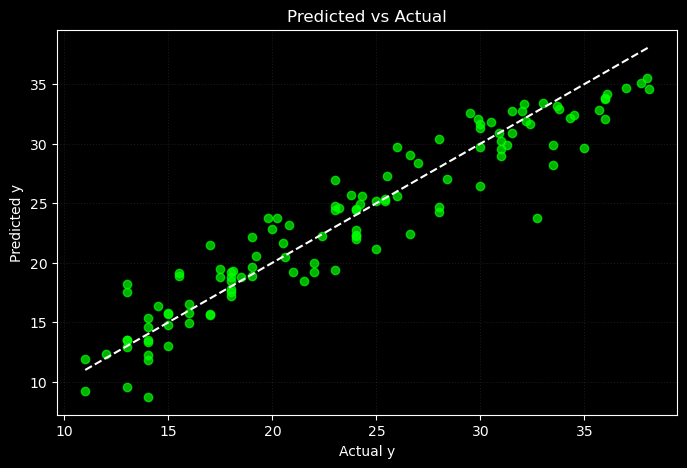

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.style.use('default')

plt.scatter(y_test, y_pred_test, color='lime', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='white', linestyle='--')

plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')  # This line removes the white outer area

plt.xlabel("Actual y", color='white')
plt.ylabel("Predicted y", color='white')
plt.title("Predicted vs Actual", color='white')
plt.tick_params(colors='white')

for spine in plt.gca().spines.values():
    spine.set_color('white')

plt.grid(True, linestyle=':', color='white', alpha=0.1)
plt.show()


### **📊 Model Performance Summary**

##### **✅ Generalization:**
Test R²: 0.8998

Train R²: 0.8450

The model generalizes well — higher R² on the test set suggests no overfitting and strong performance on unseen data.

##### **✅ Error Metrics:**
MSE increased from 5.6752 to 5.6778, a 0.02% increase in average prediction error (based on RMSE).

Both MSE and MAE continue to drop on training and test sets, indicating the model is still converging smoothly.

##### **✅ R² Score Improvements:**
Train R² practically stayed the same: 0.8451 → 0.8450

Test R² practically stayed the same: 0.8999 → 0.8998

No meaningful gain in test R² suggests the optimization path was already stable and effective.

### **📈 Summary:**
The model does not outperform the traditional implementation.

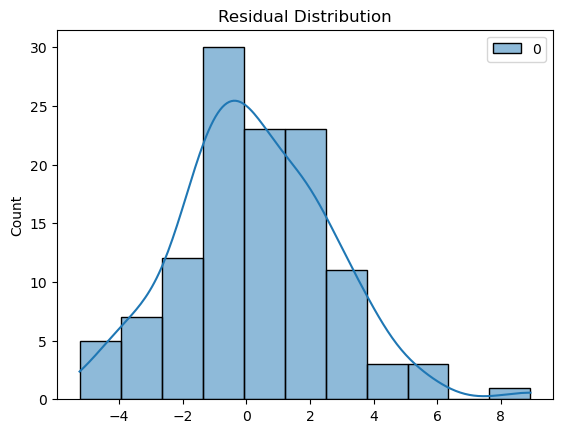

In [37]:
import seaborn as sns

residuals = y_test - y_pred_test

# Histogram works — leave as-is
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

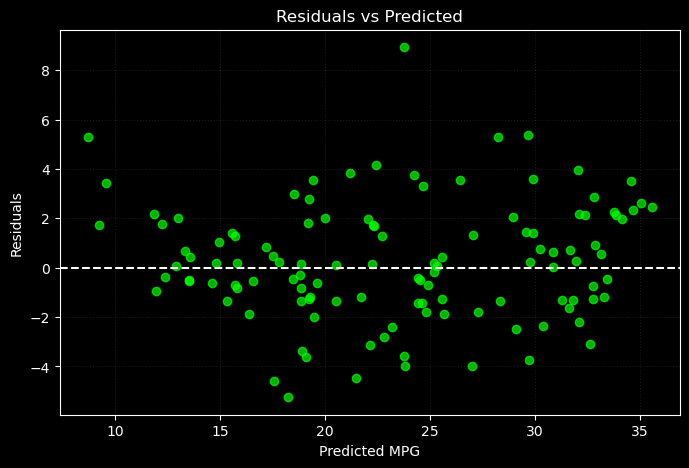

In [38]:
plt.figure(figsize=(8, 5))
plt.style.use('default')

# Basic plot with lime points and black background
plt.scatter(y_pred_test, residuals, color='lime', alpha=0.7)
plt.axhline(0, color='white', linestyle='--')

# Black background and white text
plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')  # This line removes the white outer area
plt.xlabel("Predicted MPG", color='white')
plt.ylabel("Residuals", color='white')
plt.title("Residuals vs Predicted", color='white')
plt.tick_params(colors='white')

# White border
for spine in plt.gca().spines.values():
    spine.set_color('white')

plt.grid(True, linestyle=':', color='white', alpha=0.1)
plt.show()


Residuals look evenly distributed

No strong trend or shape, which means model generalized

In [39]:
#Converting logs to DataFrame
df_log = pd.DataFrame({
    'iteration': iteration_log,
    'cost': cost_log,
    'bias': bias_log,
    'weight_log' : weight_log
})

#Saving log
#df_log.to_csv('gd_convergence_log.csv', index=False)

NameError: name 'iteration_log' is not defined

In [ ]:
# Step 1: Convert X_train_scaled to DataFrame
X_scaled_df = pd.DataFrame(X_train_scaled, columns=[f'feature_{i}' for i in range(X_train_scaled.shape[1])])

# Step 2: Combine with y_train
df_log_Xny_train = X_scaled_df.copy()

df_log_Xny_train['y_train'] = y_train.ravel()  # or y_train.flatten()

#Saving log
#df_log_Xny_train.to_csv('X-and-y-train.csv')